In [1]:
import pandas as pd

## To know how many new samples there are in december 2025

In [2]:
df = pd.read_csv("epochs_model_v1.6_256.csv", sep=";")
df.head(5)

,epoch,schedule,loss,accuracy,time
0,1,0.000950,4.760302,0.675255,751.981958
1,2,0.000902,4.680144,0.679438,229.598459
2,3,0.000857,4.642292,0.684122,236.634825
3,4,0.000815,4.605146,0.686130,234.046049
4,5,0.000774,4.594934,0.681111,229.836614


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   epoch     100 non-null    int64  
 1   schedule  100 non-null    float64
 2   loss      100 non-null    float64
 3   accuracy  100 non-null    float64
 4   time      100 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 4.0 KB


In [10]:
df_temp = df[df["year"] == 2025]
df_temp = df_temp[df_temp["month"] == 12]
df_temp = df_temp[df_temp["day"] > 6]
df_temp.shape

(6262, 19)

## To get results from SSL training

In [8]:
epoch36_max_acc = float(df["accuracy"].iloc[:36].max())
epoch36_time = float(df["time"].iloc[:36].sum())
print("Max accuracy at epoch 36:", epoch36_max_acc)
print("Training time until epoch 36:", epoch36_time/3600)


Max accuracy at epoch 36: 0.6919859461268195
Training time until epoch 36: 2.4295332317882115


In [9]:
max_acc = float(df["accuracy"].max())
time = float(df["time"].sum())
stop_epoch = df["epoch"].iloc[-1]
print("Max accuracy:", max_acc)
print("Training time:", time/3600)
print("Stop-epoch:", stop_epoch)

Max accuracy: 0.695164798393843
Training time: 5.995822073618571
Stop-epoch: 100


## Get the augmentations matrix

In [15]:
import pandas as pd

augmentation_matrix = [[None] * 4 for _ in range(4)]
order = [(0,0), (1,1), (2,2), (3,3), (0,1), (1,2), (2,3), (0,2), (1,3), (0,3)]

for i in range(10):
    df = pd.read_csv(f"epochs_model_v1.6.{i+1}_256.csv", sep=";")
    max_acc = float(df["accuracy"].max())
    time = float(df["time"].sum())

    augmentation_matrix[(order[i][0])][(order[i][1])] = max_acc

for i in range(4):
    for j in range(4):
        augmentation_matrix[j][i] = augmentation_matrix[i][j]

for row in augmentation_matrix:
    print(row)

[0.7463610506943282, 0.7381629580056884, 0.7562322235235068, 0.7247783168813786]
[0.7381629580056884, 0.693826334281412, 0.697841726618705, 0.7463610506943282]
[0.7562322235235068, 0.697841726618705, 0.703195583068429, 0.7374937259494729]
[0.7247783168813786, 0.7463610506943282, 0.7374937259494729, 0.7406725782164966]


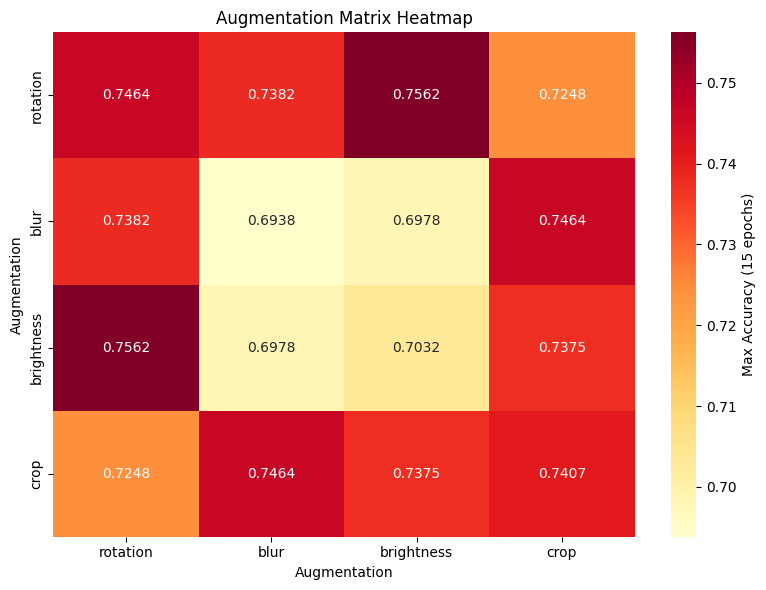

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

augmentations = ["rotation", "blur", "brightness", "crop"]

# Create heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(augmentation_matrix, 
            annot=True, 
            fmt='.4f', 
            cmap='YlOrRd',
            xticklabels=augmentations,
            yticklabels=augmentations,
            cbar_kws={'label': 'Max Accuracy (15 epochs)'})
plt.title('Augmentation Matrix Heatmap')
plt.xlabel('Augmentation')
plt.ylabel('Augmentation')
plt.tight_layout()
plt.show()